<a href="https://colab.research.google.com/github/congardiner/ML-Projects/blob/main/notebooks/xgboost_personal_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==1.5.2

In [10]:
import pandas as pd
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
housing.describe()
housing.head()
housing.shape


# DATA EXPLORATION PHASE
# housing.hist(bins=50, figsize=(20,15))
# housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

housing['yr_built'].describe()


housing['price'].describe()
housing['price'].median()
housing['price'].value_counts()
housing['price'].head()


housing['bedrooms'].describe()
housing['bedrooms'].head()
housing['bedrooms'].value_counts()


housing['bathrooms'].value_counts()
housing['bathrooms'].describe()

housing['grade'].describe()
housing['grade'].value_counts()

housing['sqft_living'].describe()
housing['sqft_living'].value_counts()
housing['sqft_living'].head()
housing['sqft_living'].median()


housing['date'].describe()
housing['date'].head()


housing['sqft_lot'].describe()
housing['sqft_lot'].head()

housing['floors'].describe()
housing['floors'].head()

housing['waterfront'].describe()
housing['waterfront'].value_counts()

housing['view'].describe()
housing['view'].value_counts()


housing['condition'].describe()
housing['condition'].value_counts()


housing['zipcode'].describe()
housing['zipcode'].value_counts()
housing['zipcode'].unique()
housing['zipcode'].notna().sum()
housing['zipcode'].isna().sum()
housing['zipcode'].mode()

housing.isna().sum()



housing['yr_renovated'].describe()
housing['yr_renovated'].value_counts()
housing['yr_renovated'].head()

housing['sqft_basement'].describe()
housing['sqft_basement'].value_counts()
housing['sqft_basement'].head()
housing['sqft_basement'].mode()


housing['lat'].describe()
housing['long'].describe()


housing['yr_built'].describe()
housing['yr_built'].value_counts()
housing['yr_built'].mode()
housing['yr_built'].head()


housing['sqft_basement'].describe()
housing['sqft_basement'].value_counts()
housing['sqft_basement'].head()
housing['sqft_basement'].mode()


housing['sqft_above'].describe()
housing['sqft_above'].value_counts()
housing['sqft_above'].head()
housing['sqft_above'].mode()


housing['sqft_living15'].describe()
housing['sqft_living15'].value_counts()
housing['sqft_living15'].head()
housing['sqft_living15'].mode()


housing['sqft_lot15'].describe()
housing['sqft_lot15'].value_counts()
housing['sqft_lot15'].head()
housing['sqft_lot15'].mode()


housing['view'].describe()



,view
count,20000.000000
mean,0.234900
std,0.767692
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


In [11]:
# Import the libraries NEEDED
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

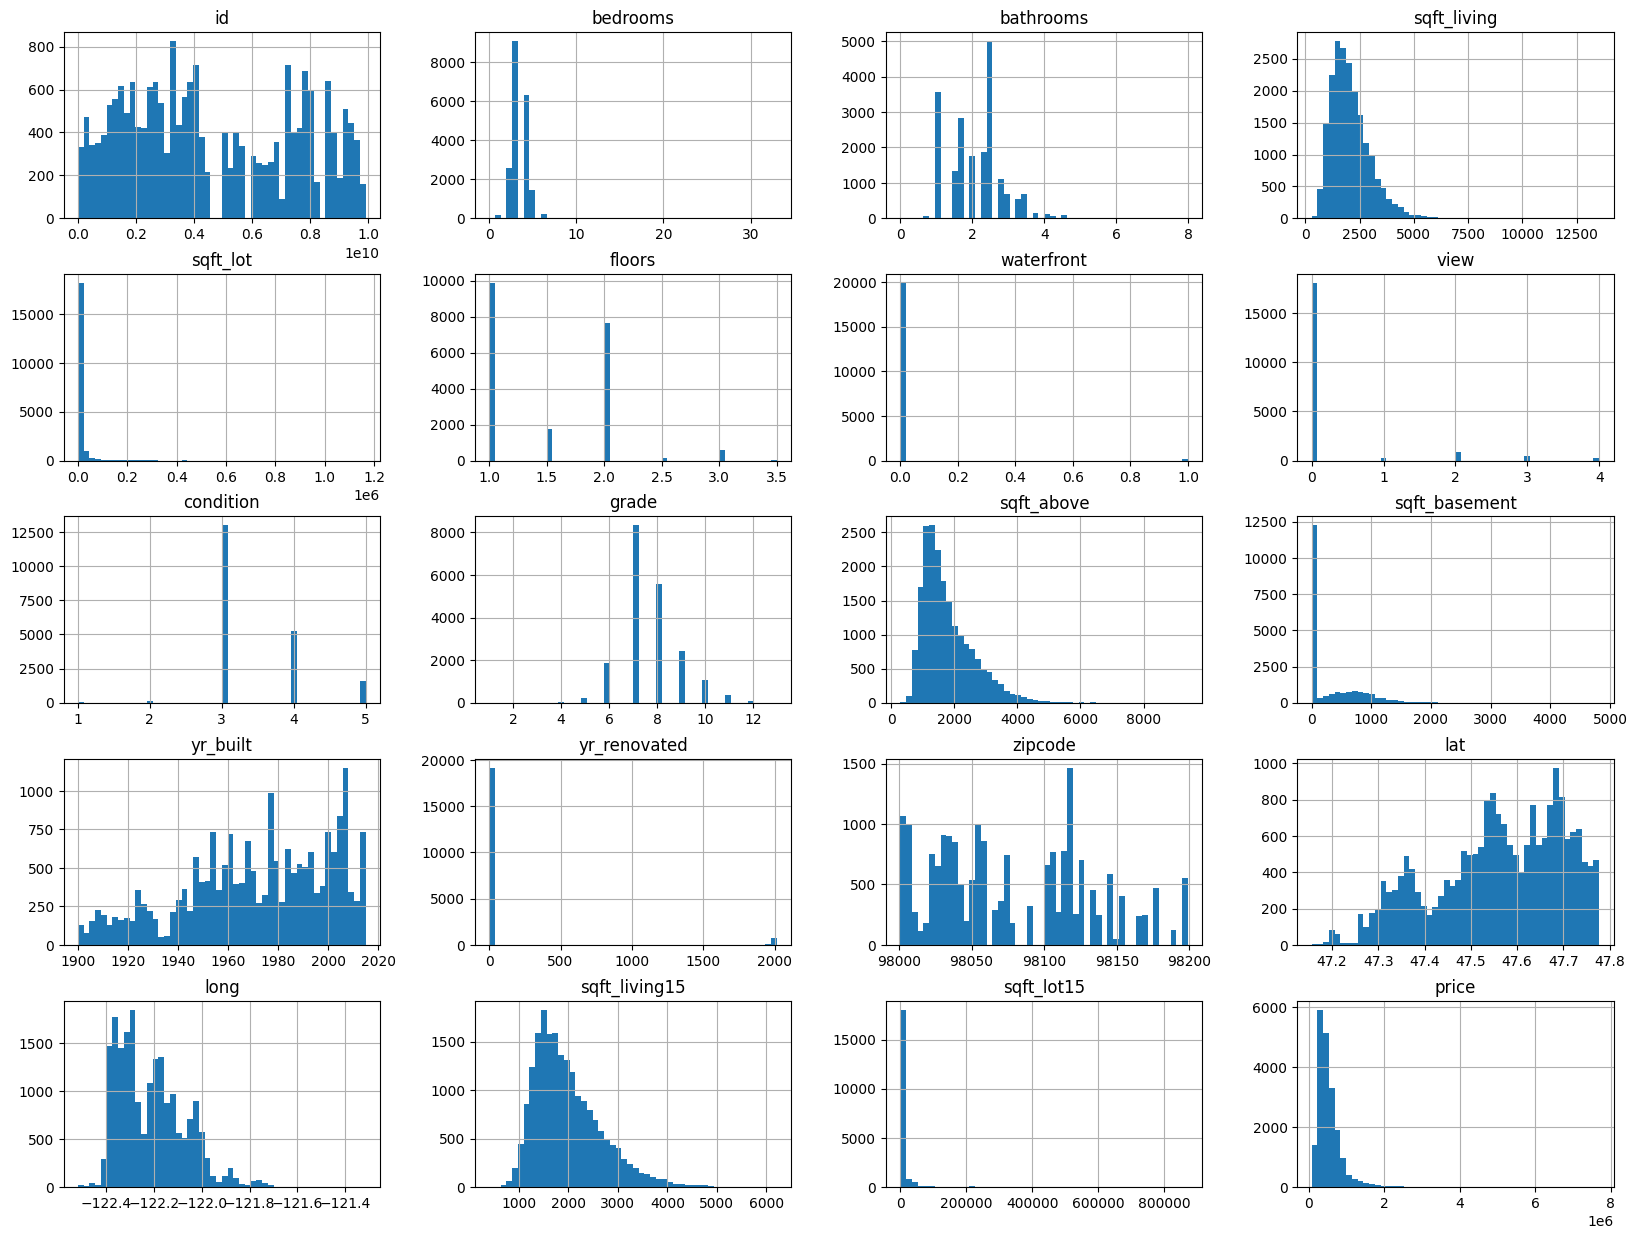

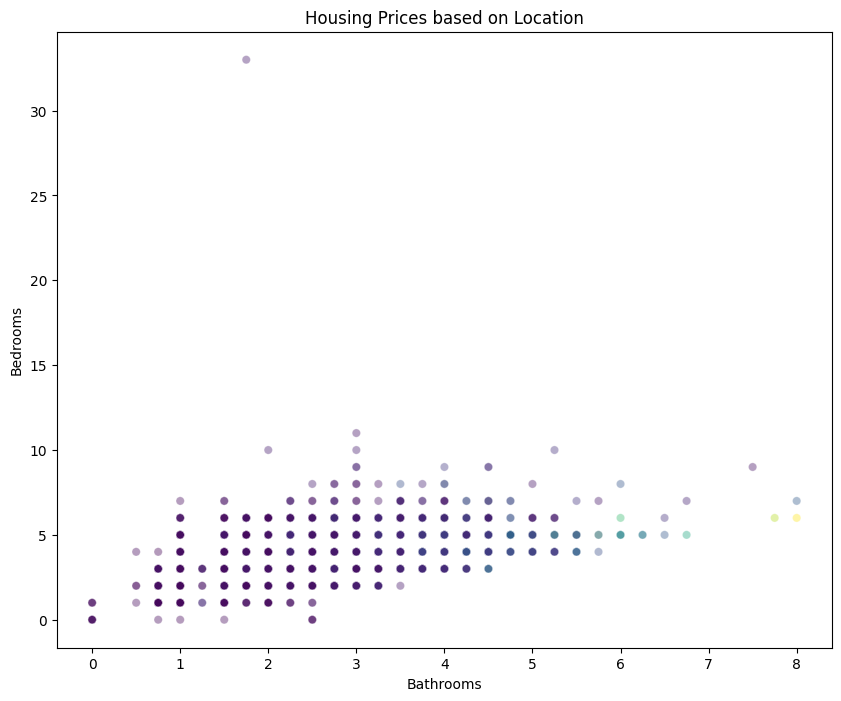

In [12]:
housing.hist(bins=50, figsize=(20,15))



plt.figure(figsize=(10, 8))
sns.scatterplot(x=housing['bathrooms'], y=housing['bedrooms'], alpha=0.4,
                c=housing['price'], cmap="viridis")
plt.title('Housing Prices based on Location')
plt.xlabel('Bathrooms')
plt.ylabel('Bedrooms')
plt.colorbar(label='Price')
plt.show()




In [14]:
housing_data = housing.copy()

housing_data.describe()


# THis is how I changed the date to accomondate for a way to read this into new columns using

housing_data['date'] = pd.to_datetime(housing_data['date'])
housing_data['year'] = housing_data['date'].dt.year
housing_data['month'] = housing_data['date'].dt.month
housing_data['day'] = housing_data['date'].dt.day

housing_data.describe()


housing_data = housing_data.drop('date', axis=1)

# Verify the column is dropped
print(housing_data.head())



           id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  1565930130         4       3.25         3760      4675     2.0           0   
1  3279000420         3       1.75         1460      7800     1.0           0   
2   194000575         4       1.00         1340      5800     1.5           0   
3  2115510160         3       1.75         1440      8050     1.0           0   
4  7522500005         2       1.50         1780      4750     1.0           0   

   view  condition  grade  ...  yr_renovated  zipcode      lat     long  \
0     0          3      8  ...             0    98038  47.3862 -122.048   
1     0          2      7  ...             0    98023  47.3035 -122.382   
2     2          3      7  ...             0    98116  47.5658 -122.389   
3     0          3      8  ...             0    98023  47.3187 -122.390   
4     0          4      7  ...             0    98117  47.6859 -122.395   

   sqft_living15  sqft_lot15     price  year  month  day  
0  

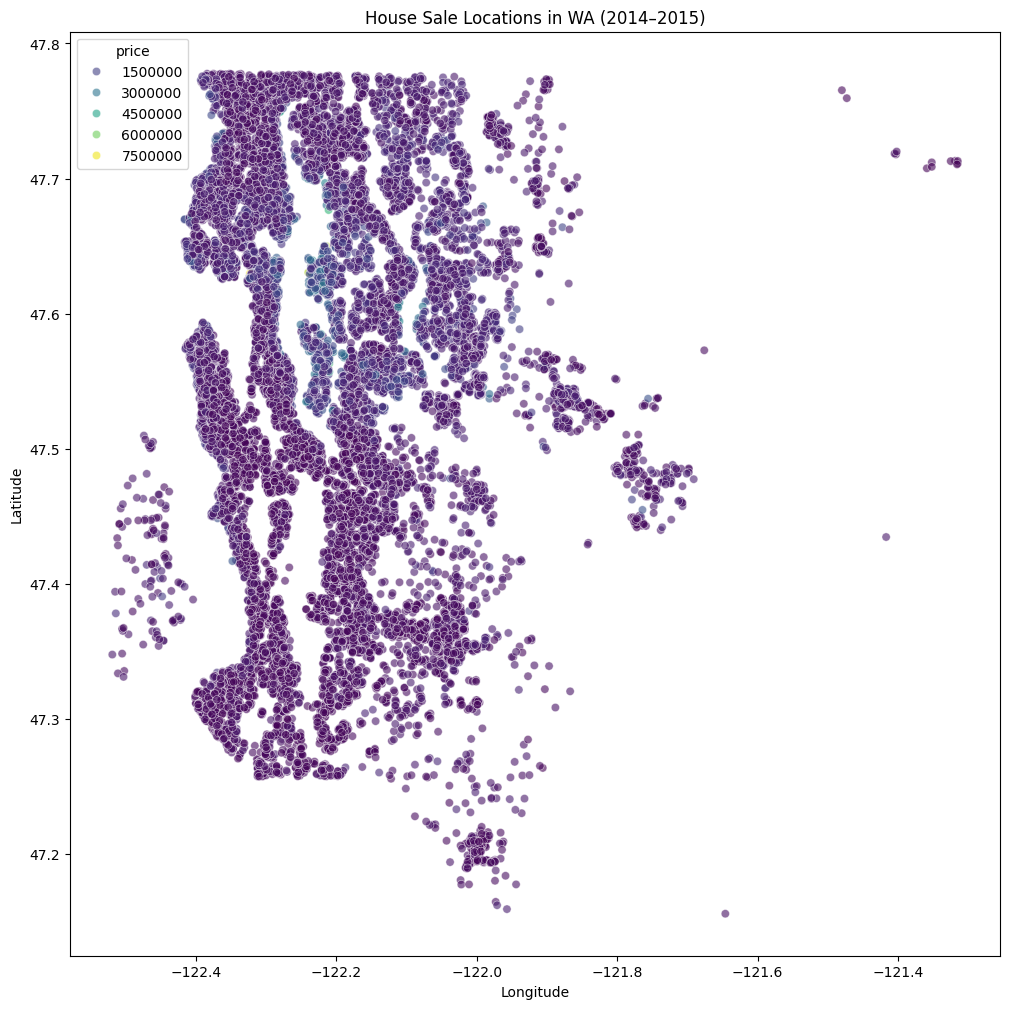

In [13]:
# Comparing long versus latitude to determine the extent of where our data is located as Zip Code is non-specific and not eligible...
# I created a separate copy of the df to test and track the longitude and latitude within this housing dataset.

housing_price_copy = housing.copy()

housing_price_copy['price_formatted'] = housing_price_copy['price'].astype(int).apply(lambda x: f'${x:,.0f}')


# Binning and labels applied to the pricing categories...
housing_price_copy['price_bins'] = pd.cut(housing_price_copy['price'], bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])



plt.figure(figsize=(12, 12))
sns.scatterplot(data=housing_price_copy, x='long', y='lat', hue='price', palette='viridis', alpha=0.6)
plt.title('House Sale Locations in WA (2014–2015)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Note: Something that I will add is a way to differentiate the price via binning, which should be considered within this plot.
# Another item that I am wanting to consider is that I want to have cities if possible also labeled, overlayed either in this plot, or a different one altogether.

# Source for the Census: https://data.census.gov/table?t=Income+and+Poverty&g=040XX00US53
# https://www.kaggle.com/search?q=housing+price+demographic (found our dataset to validate published data from this df)



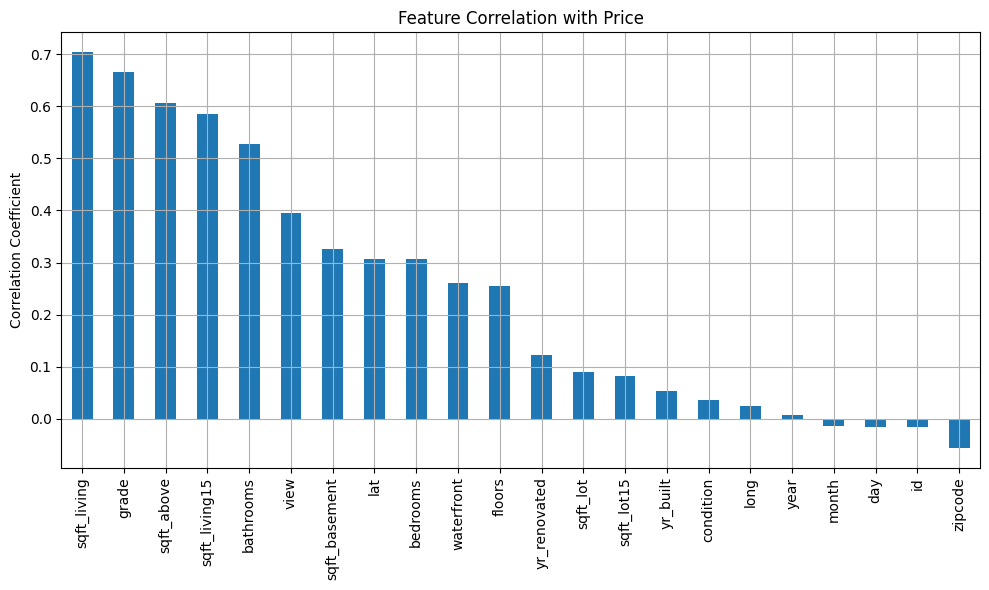

In [15]:
# Feature Importance TIME

feature_importance = housing_data.corr()
feature_importance['price'].sort_values(ascending=False)

feature_importance

feature_importance = housing_data.corr()
price_corr = feature_importance['price'].sort_values(ascending=False)

# Plot of my Feature Importance (Versus Price as the Predictor)
plt.figure(figsize=(10, 6))
price_corr.drop('price').plot(kind='bar')
plt.title('Feature Correlation with Price')
plt.ylabel('Correlation Coefficient')

plt.grid(True)
plt.tight_layout()
plt.show()





In [39]:
# Splitting and Training into Datasets...

# Features in consideration, however, there is potentially more data exploration that needs to be done to isolate outliers and determine overall performance metrics with XGBOOST.

X = housing_data[['bedrooms', 'yr_built', 'grade', 'floors', 'bathrooms', 'sqft_living', 'lat', 'long', 'waterfront', 'view', 'sqft_living15', 'sqft_above', 'sqft_lot']]
y = housing_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [40]:
# Default Hyper Parameters applied, to be fine tuned and tested once data exploration is complete.
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
# Predictions for the DF using basic XG BOOST.

predictions = model.predict(X_test)
predictions

array([ 465455.72,  429990.25,  500718.7 , ..., 1043074.06,  672862.5 ,
        781127.2 ], dtype=float32)

<Axes: >

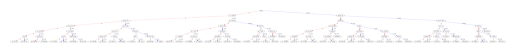

In [42]:
from xgboost import plot_tree
from sklearn.metrics import accuracy_score


plot_tree(model, num_trees=0)

In [43]:
# Compute the Root Mean Squared Error of the predictions
from sklearn.metrics import root_mean_squared_error

result_RMSE = root_mean_squared_error(y_test, predictions)
result_RMSE




136054.37361695414

In [44]:
from sklearn.metrics import r2_score


r2 = r2_score(y_test, predictions)
print("R² Score:", r2)

R² Score: 0.8639191925525912
